<a href="https://colab.research.google.com/github/GauravSahani1417/Time-Series-Modelling-and-Analysis/blob/main/Auto_Regressive_Time_Series_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#Importing the required packages!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline

In [3]:
file_path = "/content/drive/MyDrive/ts_data.xlsx"

In [4]:
df = pd.read_excel(file_path)
df.head()

,Time,Value
0,1,0.000000
1,2,-0.090263
2,3,0.749995
3,4,1.247887
4,5,0.131282


In [5]:
df.shape

(10000, 2)

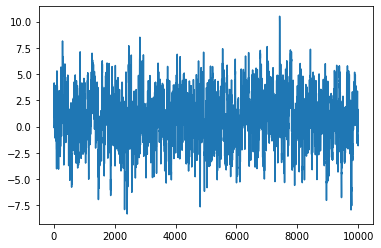

In [6]:
plt.plot(df["Value"])

In [7]:
#By visualizing, we can see the graph is Stationary, as,
#1. Mean is constant
#2. Variance is constant
#3. There no seasonality as such

# But We need to verify this using Dicky-fuller method!

In [8]:
#This is an syntax for Dicky-Fuller algrithm!
X = df["Value"].values
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -22.184930
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


In [10]:
#We can see the P-Value is 0.00, ie. You rejected null hypothesis and accepted the alternate hypothesis!
#Now since the time-series is stationary, we can go for forecasting!

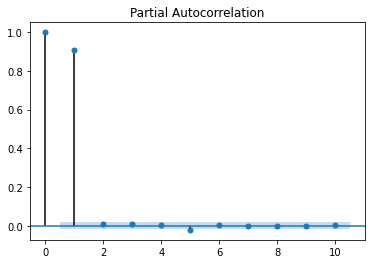

In [11]:
#Now to know the order of the Auto-regressive model, or total no. of lags to create the AR model, we will plot a PACF Plot
#i.e. Partial auto-correlation plot!

plot_pacf(X, lags=10);

In [12]:
#We can see that, Y(t) when compared with Y(t) has a correlation of 1,
#Also, Y(t), compared with Y(t-1) is too good, but after Y(t-2),Y(t-3)... the data is not much co-related!
#Hence, it indicates us to do analysis with "Lag=1"!!

In [15]:
#Hence at this stage we only need to design our model for this particular equation:
# Y(t) = @(Constant) + bY(t-1) + Random-Noise......ie. Lag = 1

#Now, to calculate Alpha and Beta, we need to design a linear regression model!

In [16]:
#In order to get Y(t-1), we will shift the rows downwards!

df["Values_shifted"]  = df["Value"].shift()
df.head()

,Time,Value,Values_shifted
0,1,0.000000,NaN
1,2,-0.090263,0.000000
2,3,0.749995,-0.090263
3,4,1.247887,0.749995
4,5,0.131282,1.247887


In [17]:
#Here, value is Y(t), and Value_shifted is Y(t-1).

df.drop('Time', axis = 1, inplace=True)
df.dropna(inplace=True)

In [18]:
df.head(10)

,Value,Values_shifted
1,-0.090263,0.000000
2,0.749995,-0.090263
3,1.247887,0.749995
4,0.131282,1.247887
5,0.562619,0.131282
6,2.292577,0.562619
7,2.543161,2.292577
8,3.456542,2.543161
9,3.284080,3.456542
10,2.111860,3.284080


In [19]:
#We will split the data as X and y, for using them in Linear regression model!
y = df.Value.values
X = df.Values_shifted.values

In [20]:
train_size = int(len(X) * 0.80)


X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [21]:
#We can't random split the data for time-series data, since we need the continuous values to be forecasted!

In [22]:
#Since our train,test data have 1-dimension, which can lead to error, reason we are reshaping the data as 2-dimensions!
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [23]:
#Initializing the model!
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(lr.coef_)
print(lr.intercept_)

[0.90550879]
0.06868111625452289


In [25]:
#Hence, we are successful in finding alpha(constant) and beta value!
#Now we will find some predictions to see whether our model works good or not!

In [26]:
y_pred = lr.predict(X_test)

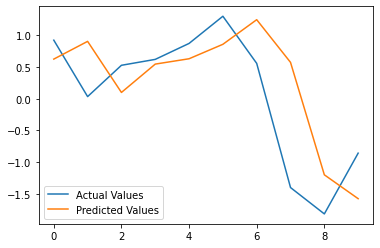

In [27]:
plt.plot(y_test[-10:], label="Actual Values")
plt.plot(y_pred[-10:], label="Predicted Values")
plt.legend()
plt.show()

In [28]:
#We can see that our model has fitted decent on the patterns!

In [31]:
#Lets now implement our AR model using ARIMA Package!
#I.e. We are initializing AR Model using ARIMA Package.
model = ARIMA(y_train, order=(1,0,0))

#Considering the order, we have mentioned the value for AR Term= "1",
#While for "I" and "MA" Term we have mentioned "0".

In [32]:
#Here, we fit our model!
model_fit = model.fit()

In [33]:
#Printing our the model summary!
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 7999
Model:                     ARMA(1, 0)   Log Likelihood              -11364.832
Method:                       css-mle   S.D. of innovations              1.002
Date:                Fri, 20 Nov 2020   AIC                          22735.663
Time:                        09:31:19   BIC                          22756.624
Sample:                             0   HQIC                         22742.838
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7250      0.118      6.130      0.000       0.493       0.957
ar.L1.y        0.9054      0.005    190.940      0.000       0.896       0.915
                                    Roots           